In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data = loadmat("ex7data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

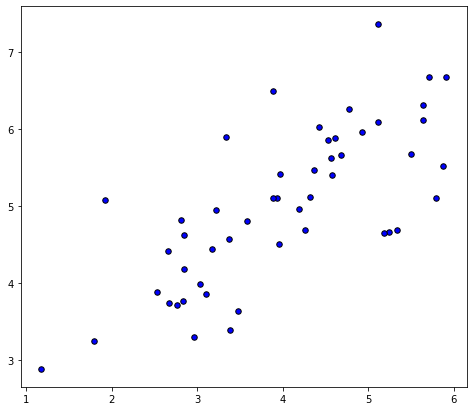

In [3]:
plt.rcParams['figure.figsize'] = (8.0, 7.0)
plt.scatter( data['X'][:,0], data['X'][:,1], s=30, edgecolors='black',facecolors='blue', linewidth=1 )

In [4]:
def normalize( X ):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return (X - X.mean(axis=0))/X.std(axis=0), mu, sigma

In [5]:
X_norm, mu, sigma = normalize(data['X'])

In [6]:
def pca(X):
    m, n = X.shape
    cov_data = ( X.T.dot(X) )/m
    U, S, V = np.linalg.svd( cov_data )
    return (U, S)

In [7]:
U, S = pca(X_norm)

In [8]:
print(U, S)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] [1.73553038 0.26446962]


In [9]:
mu

array([3.98926528, 5.00280585])

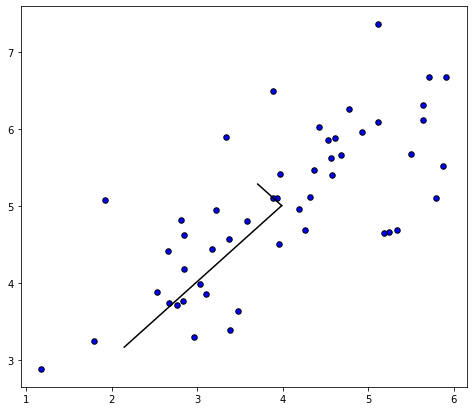

In [10]:
plt.rcParams['figure.figsize'] = (8.0, 7.0)
plt.scatter( data['X'][:,0], data['X'][:,1], s=30, edgecolors='black',facecolors='blue', linewidth=1 )
plt.plot( np.append( mu[0], mu[0] + 1.5*S[0]*U[0,0] ), np.append( mu[1], mu[1] + 1.5*S[0]*U[1,0] ),'k-', linewidth=1.5 )
plt.plot( np.append( mu[0], mu[0] + 1.5*S[1]*U[0,1] ), np.append( mu[1], mu[1] + 1.5*S[1]*U[1,1] ), 'k-', linewidth=1.5 )

In [11]:
def project_data( X, U, K ):
    U_reduce = U[:, :K] # Each column is a u^{i} vector
    return X.dot(U_reduce)

In [12]:
K = 1
Z = project_data(X_norm, U, K)
Z[0]

array([1.49631261])

In [13]:
def recover_data( Z, U, K ):
    U_reduce = U[:, :K] # Each column is a u^{i} vector
    return U_reduce.dot(Z.T)

In [14]:
X_approx = recover_data( Z, U, K )
X_approx = X_approx.T

In [15]:
X_approx[0]

array([-1.05805279, -1.05805279])

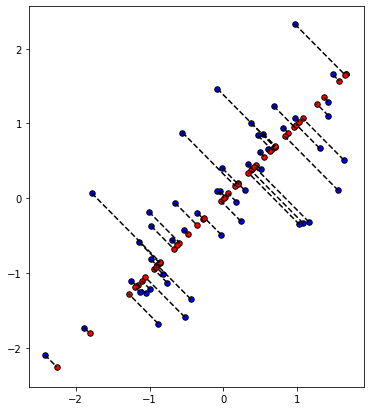

In [16]:
plt.rcParams['figure.figsize'] = (6.0, 7.0)
plt.scatter( X_norm[:,0], X_norm[:,1], s=30, edgecolors='black',facecolors='blue', linewidth=1 )
plt.scatter( X_approx[:,0], X_approx[:,1], s=30, edgecolors='black',facecolors='red', linewidth=1 )
for i in range(X_approx.shape[0]):
    plt.plot( (X_norm[i,0], X_approx[i,0]), (X_norm[i,1], X_approx[i,1]), 'k--' )